# Lab 2.7

In [8]:
import ugradio
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [43]:
def PS(x, divisor):
    """Takes in a complex array and outputs a plot of frequency versus power spectrum."""

    Vsamp = 62.5/divisor
    N = 16000
    
    a = x[:len(x)/2]
    b = x[len(x)/2:]
    c = a + b * 1j

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    f,fx = ugradio.dft.dft(c[:N],t=time, vsamp=Vsamp)
    P = np.abs(fx)**2
    plt.plot(f,P)
    plt.xlabel("Frequency")
    plt.ylabel("Power [volt-second^2]")
    plt.show()

## Average

### Changing First LO

LO for upper baseband: 1231 MHz

LO for lower baseband: 1229 MHz

Power of LO: 13 dBm

x = ugradio.pico.capture_data('50mV', divisor=8, dual_mode=True, nsamples=16000, nblocks=1000)

np.save('upper_block_n', x)

Took data 10 times resulting in 10,000 total blocks. Repeated for lower.

take average power spectrum of nblocks = 1000

everything = np.load('upper_block_1.npy')

all_files = []

for integer in range(1000):
    data = everything[integer*32000 : 32000 * (integer +1)]
    all_files.append(data)
    
power_arrays = []

for data in all_files:
    real = data[:len(data)/2]
    imag = data[len(data)/2:len(data)]
    complex_data = real + (imag * 1j)
    voltage = np.fft.fft(complex_data)
    power = np.abs(voltage)**2
    power_arrays.append(power)
    
avg = sum(power_arrays) / len(power_arrays)
s_on = avg

frequency = np.fft.fftfreq(len(s_on))
plt.plot(frequency, np.log(s_on), 'k.')
plt.title('Average Online Spectrum (Block 1)')
plt.xlabel('Frequency')
plt.ylabel('Log of Power [volt-second^2]')
plt.show()

take average power spectrum of nblocks = 1000

everything = np.load('lower_block_1.npy')

all_files = []

for integer in range(1000):
    data = everything[integer*32000 : 32000 * (integer +1)]
    all_files.append(data)
    
power_arrays = []

for data in all_files:
    real = data[:len(data)/2]
    imag = data[len(data)/2:len(data)]
    complex_data = real + (imag * 1j)
    voltage = np.fft.fft(complex_data)
    power = np.abs(voltage)**2
    power_arrays.append(power)
    
avg = sum(power_arrays) / len(power_arrays)
s_off = avg

frequency = np.fft.fftfreq(len(s_off))
plt.plot(frequency, np.log(s_off), 'k.')
plt.title('Average Offline Spectrum (Block 1)')
plt.xlabel('Frequency')
plt.ylabel('Log of Power [volt-second^2]')
plt.show()

In [2]:
def avg_ps(data, n):
    """Takes in a dualmode dataset of n blocks -- 16000 samples each -- and returns a power spectrum averaged over all blocks"""
    
    real = data[:len(data)/2]
    imag = data[len(data)/2:len(data)]
    complex_data = real + (imag * 1j)
    voltage = np.fft.fft(complex_data)
    power = np.abs(voltage)**2 # len = 16000n
     
    power_blocks = [] # total len = n, item len = 16000
    
    for i in range(n):
        x = power[i * 16000 : 16000 * (i + 1)]
        power_blocks.append(x)
        
    avg_power = sum(power_blocks) / len(power_blocks)
    frequency = np.fft.fftfreq(len(avg_power))
    return(avg_power, frequency)

<IPython.core.display.Javascript object>


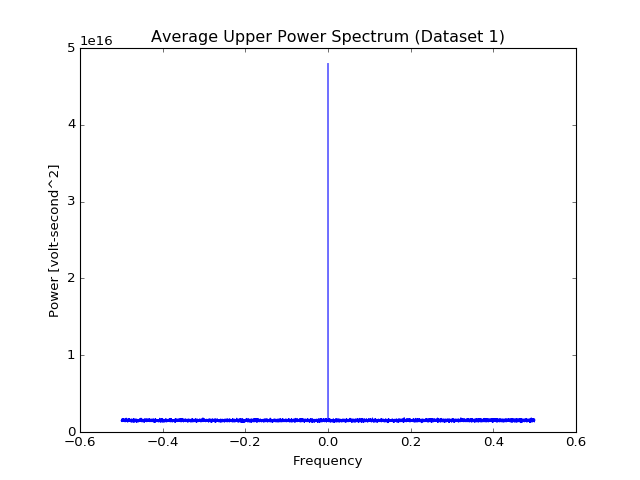

In [9]:
data = np.load('upper_block_1.npy')
power, freq = avg_ps(data, 1000)
plt.plot(freq, power)
plt.title('Average Upper Power Spectrum (Dataset 1)')
plt.xlabel('Frequency')
plt.ylabel('Power [volt-second^2]')
plt.show()

### Changing second LO

LO for upper baseband = 191 MHz

LO for lower baseband = 189 MHz

x = ugradio.pico.capture_data('50mV', divisor=8, dual_mode=True, nsamples=16000, nblocks=1000)

np.save('upper-n', x)

Took data 10 times resulting in 10,000 total blocks. Repeated for lower.

In [ ]:
data1 = np.load('upper-1.npy')
power1, freq1 = avg_ps(data1, 1000)

In [ ]:
plt.plot(freq1, power1)
plt.title('Average Upper Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power [volt-second^2]')
plt.show()

## Line Shape

In [36]:
s_line = s_on/s_off

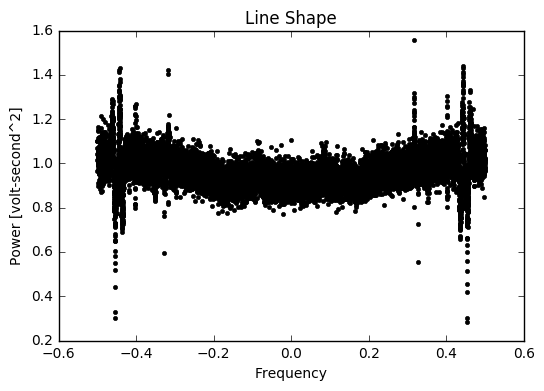

In [51]:
frequency = np.fft.fftfreq(len(s_line))
plt.plot(frequency, s_line, 'k.')
plt.title('Line Shape')
plt.ylabel('Power [volt-second^2]')
plt.xlabel('Frequency')
plt.show()

## Line Intensity

In [15]:
T_cold = 3 # K
T_cal = 300 # K

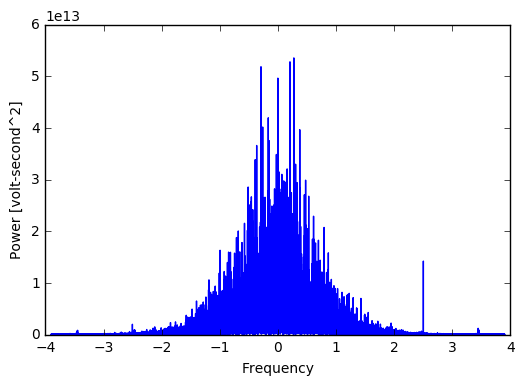

In [48]:
cold = np.loadtxt('sCold-2-24-19.txt')
PS(cold, 8)
plt.title('Sky pspec')

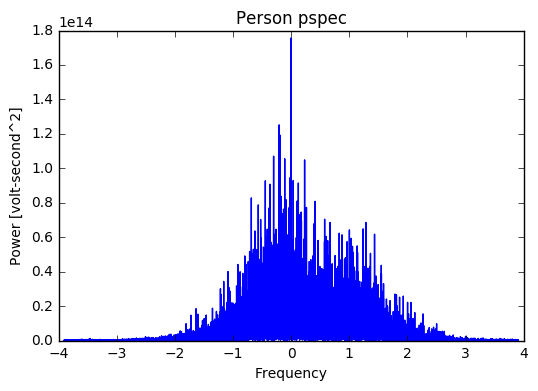

In [45]:
cal = np.loadtxt('sPerson-2-24-19.txt')
PS(cal, 8)
plt.title('Person pspec')

In [17]:
Vsamp = 62.5/8
N = 16000
time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)

cold = np.loadtxt('sCold-2-24-19.txt')
a_cold = cold[:len(cold)/2]
b_cold = cold[len(cold)/2:]
c_cold = a_cold + b_cold * 1j
f,fx = ugradio.dft.dft(c_cold[:N],t=time, vsamp=Vsamp)
P_cold = np.abs(fx)**2

cal = np.loadtxt('sPerson-2-24-19.txt')
a_cal = cal[:len(cal)/2]
b_cal = cal[len(cal)/2:]
c_cal = a_cal + b_cal * 1j
f,fx = ugradio.dft.dft(c_cal[:N],t=time, vsamp=Vsamp)
P_cal = np.abs(fx)**2

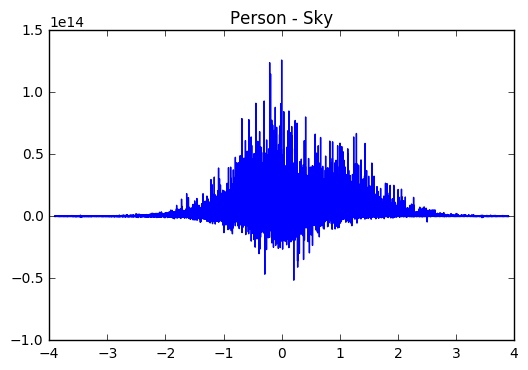

In [39]:
plt.plot(f, P_cal-P_cold)
plt.title('Person - Sky')
plt.show()

In [19]:
# obtain gain

G = (T_cal - T_cold)/(np.sum(P_cal - P_cold)) * np.sum(P_cold)
print(G)

126.34495924


In [46]:
T_line = s_line * G

## Plot Intensity vs. Frequency -- and Velocity

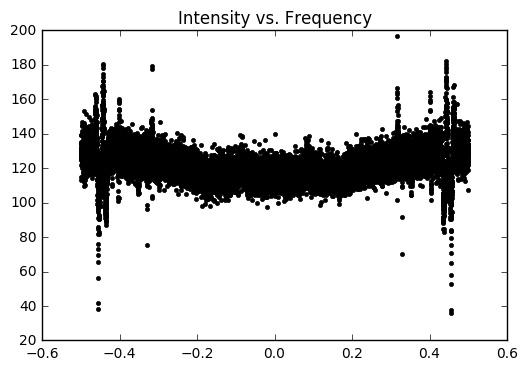

In [47]:
frequency = np.fft.fftfreq(len(T_line))
plt.plot(frequency, T_line, 'k.')
plt.title('Intensity vs. Frequency')
plt.show()

## Doppler Correction

ugradio.doppler.get_projected_velocity(ra, dec, jd, obs_lat=37.873199, obs_lon=-122.257063, obs_alt=120.0, epoch=2451545.0)

get_projected_velocity(ra, dec, jd, obs_lat=nch.lat, obs_lon=nch.lon, 
        obs_alt=nch.alt, epoch=2451545.):
    '''Compute the projected velocity of the telescope wrt the 
    Local Standard of Rest.
    Parameters
    ----------
    ra, dec : float degrees, the RA/DEC of target
    jd      : float, julian date (UTC) of the observation
    obs_lat : float degrees, latitude of observatory, default=nch.lat
    obs_lon : float degrees, longitude of observatory, default=nch.lon
    obs_alt : float meters, altitude of observatory, default=nch.alt
    epoch   : float, julian date epoch of ra/dec coordinates
              default=2451545 is J2000

    Returns
    -------
    v : float m/s, barycenter-corrected radial velocity,
        see (Wright & Eastman, 2014) '''

In [23]:
# data taken changing first LO

lat = 37.873199 # for Campbell Hall

jd = 2458539.451389 # 22:50 UTC (14:50 PST), 2/24/2019
lst = ugradio.timing.lst(jd)

v = ugradio.doppler.get_projected_velocity(ra=lst, dec=lat, jd=jd) 
print(v)

[-16861.65812534]


In [22]:
# data taken changing second LO

lat = 37.873199 # for Campbell Hall

jd = ugradio.timing.julian_date() # 20:42 UTC (12:42 PST), 2/27/2019
lst = ugradio.timing.lst()

v = ugradio.doppler.get_projected_velocity(ra=lst, dec=lat, jd=jd) 
print(v)

[-17711.16423106]


In [28]:
# frequency offset

c = 299792.458 #km/s
f_0 = 1420.4058 # MHz
f = - f_0 * (v / c)
print(f)

[ 83.91485418]
